SUBMISSION DICODING MACHINE LEARNING PEMULA


RESTA ADITYATAMA

      Dataset harus dibagi menjadi train set dan validation set.
      Harus mengimplementasikan augmentasi gambar.
      Menggunakan image data generator.
      Model harus menggunakan model sequential.
      Pelatihan model tidak melebihi waktu 30 menit.
      Program dikerjakan pada Google Colaboratory.
      Akurasi dari model minimal 85%.
      Dapat memprediksi gambar yang diunggah ke Colab


In [ ]:
import tensorflow as tf
import os
import zipfile
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploadedfile = files.upload()

for fn in uploadedfile.keys():
  print('berhasil upload file "{name}"'.format(
      name=fn))

Saving kaggle.json to kaggle.json
berhasil upload file "kaggle.json"


In [ ]:

!chmod 600 /content/kaggle.json

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle datasets download -d die9origephit/pepsi-and-cocacola-images

 60% 5.00M/8.37M [00:01<00:00, 4.02MB/s]
100% 8.37M/8.37M [00:01<00:00, 6.68MB/s]


In [ ]:
local_zip = 'pepsi-and-cocacola-images.zip'
zip = zipfile.ZipFile(local_zip, 'r')
zip.extractall('/content/pepco/')
zip.close()

In [ ]:

base_dir = '/content/pepco'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'test')

In [ ]:

num_label = {}
total_files = 0
for i in os.listdir(train_dir):
    counting = len(os.listdir(os.path.join(train_dir, i)))
    num_label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

Total Files : 340


In [ ]:
os.listdir('/content/pepco/train')

['cocacola', 'pepsi']

In [ ]:
os.listdir('/content/pepco/test')

['cocacola', 'pepsi']

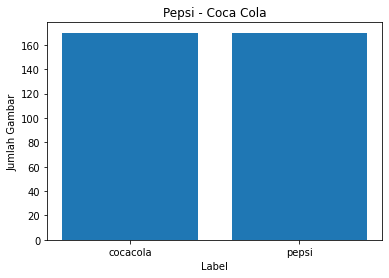

In [ ]:
plt.bar(num_label.keys(), num_label.values());
plt.title("Pepsi - Coca Cola");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    shear_range=0.3,
                    zoom_range=0.3,
                    horizontal_flip=True,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [ ]:
TARGET_SIZE = (150,150)
BATCH_SIZE = 8

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size= TARGET_SIZE,  
        batch_size=BATCH_SIZE,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir, 
        target_size= TARGET_SIZE, 
        batch_size=BATCH_SIZE,
        class_mode='binary')

Found 340 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
 modelhistory = model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=10, 
      validation_data=validation_generator, 
      validation_steps=5, 
      verbose=2)

Epoch 1/10
25/25 - 17s - loss: 0.7208 - accuracy: 0.6071 - val_loss: 0.3373 - val_accuracy: 0.9000 - 17s/epoch - 698ms/step
Epoch 2/10
25/25 - 17s - loss: 0.4161 - accuracy: 0.8214 - val_loss: 0.2060 - val_accuracy: 0.9500 - 17s/epoch - 661ms/step
Epoch 3/10
25/25 - 16s - loss: 0.2342 - accuracy: 0.9286 - val_loss: 0.0478 - val_accuracy: 1.0000 - 16s/epoch - 639ms/step
Epoch 4/10
25/25 - 17s - loss: 0.1231 - accuracy: 0.9400 - val_loss: 0.0245 - val_accuracy: 1.0000 - 17s/epoch - 669ms/step
Epoch 5/10
25/25 - 16s - loss: 0.0856 - accuracy: 0.9550 - val_loss: 0.0122 - val_accuracy: 1.0000 - 16s/epoch - 644ms/step
Epoch 6/10
25/25 - 17s - loss: 0.1133 - accuracy: 0.9700 - val_loss: 0.0015 - val_accuracy: 1.0000 - 17s/epoch - 691ms/step
Epoch 7/10
25/25 - 16s - loss: 0.1415 - accuracy: 0.9592 - val_loss: 0.0174 - val_accuracy: 1.0000 - 16s/epoch - 635ms/step
Epoch 8/10
25/25 - 16s - loss: 0.1552 - accuracy: 0.9643 - val_loss: 0.0910 - val_accuracy: 1.0000 - 16s/epoch - 640ms/step
Epoch 9/

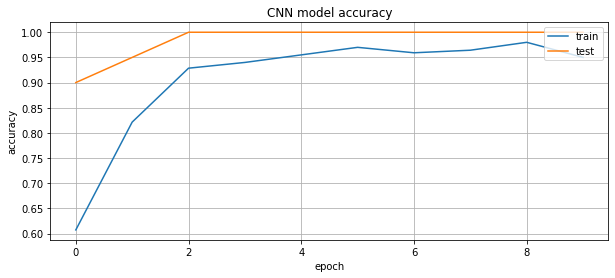

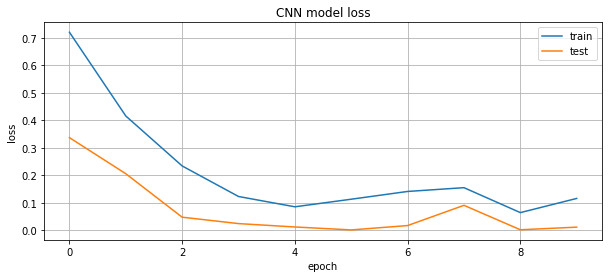

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()

print()

plt.figure(figsize=(10,4))
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()

Saving 9dfb225a-637b-46e2-beb7-a31cab0553d2.jpeg to 9dfb225a-637b-46e2-beb7-a31cab0553d2.jpeg
1/1 [==============================] - 0s 173ms/step
9dfb225a-637b-46e2-beb7-a31cab0553d2.jpeg
Pepsi


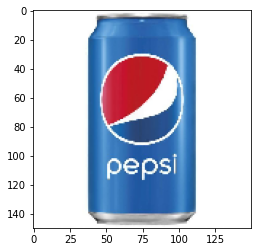

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 

  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes==0:
   print('Coca cola')
  else:
   print('Pepsi')